<a href="https://colab.research.google.com/github/Jain-Nishkarsh/SUTT_AI-ML_Task/blob/main/SUTT_AI_ML_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("/content/Training Data - Recruitments 2024 - GPL Prediction - Training Data.csv")
display(data)

,SEX,AGES,ADMISSION MODE,CGPA - 1,CGPA-2,CLUB / DEPARTMENT,BOARD STUDIED,DAYS SINCE LAST SHOWER,BIRTHDAY,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL
0,male,19.0,BITSAT,8.85,7.0,NaN,CBSE,12,4/22/2005,4,YES,NO,LITE,20495,5.00,NO
1,female,21.0,DASA,7.01,9.0,NaN,ICSE,1,8/8/2003,1,YES,NO,GHOT,2361,0.20,YES
2,female,20.0,BITSAT,3.00,8.0,NaN,CBSE,5,5/5/2004,4,YES,NO,GHOT,8548,0.30,YES
3,female,NaN,DASA,NaN,NaN,NaN,CBSE,7,10/6/2003,4,YES,NO,GHOT,4086,0.20,YES
4,male,21.0,BITSAT,5.65,9.0,NaN,CBSE,7,3/15/2003,3,YES,NO,LITE,13767,8.50,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,male,19.0,BOARD TOPPER,6.02,3.0,NaN,CBSE,6,7/16/2005,0,NO,NO,GHOT,13166,3.90,NO
1095,female,24.0,BOARD TOPPER,3.57,6.0,NaN,CBSE,5,2/3/2000,2,NO,NO,GHOT,5619,0.30,YES
1096,female,21.0,BITSAT,3.71,5.0,Gaming Club,CBSE,0,4/12/2003,4,NO,YES,LITE,17559,5.40,NO
1097,male,22.0,DASA,9.68,5.0,NaN,CBSE,3,4/25/2002,3,NO,NO,GHOT,16411,8.70,NO


# **Cleaning Data**

In [ ]:
# Renaming the columns
data.rename(columns = {
            " AGES": "AGES",
            "CGPA - 1": "CGPA-1",
            " CLUB / DEPARTMENT": "CLUB/DEPARTMENT",
            " HAS A S/O ?": "HAS A S/O?"
        }, inplace = True)

In [ ]:
#Checking if anomaly in age and birthday and if there then giving preference to birthday to assign age
from datetime import datetime
for i in range(data.count().max()):
    if datetime.now().year - int(data.iloc[i, 8].split("/")[2]) != data.iloc[i, 1]:
        data.at[i, "AGES"] = datetime.now().year - int(data.iloc[i, 8].split("/")[2])

In [ ]:
#Fixing weird club/department names and label-encoding
print(data["CLUB/DEPARTMENT"].unique())
data.replace(['Mountaneering', 'Mtaineering', 'Mountainring', 'moneering', 'Mou'], 'Mountaineering', inplace=True)
data.replace(['DVm', 'dv', 'VM'], 'DVM', inplace=True)
data.replace(['SuTT', 'SUTt'], 'SUTT', inplace=True)
data.replace(['Gaing Clu', 'Gaming', 'Gamub'], 'Gaming Club', inplace=True)

[nan 'Mountaineering' 'Gaming Club' 'SuTT' 'Mountaneering' 'DVm' 'DVM'
 'SUTT' 'Gaing Clu' 'Mtaineering' 'SUTt' 'Mountainring' 'Gaming' 'dv'
 'moneering' 'VM' 'Mou' 'Gamub']


In [ ]:
#removed the invalid board studied because only 2 values
data = data.drop(data[data["BOARD STUDIED"] == 'Invalid'].index).reset_index(drop=True)

In [ ]:
def get_weekday(value):
    return datetime.strptime(value, '%m/%d/%Y').weekday()

In [ ]:
#Splitting birthday into day and date so easier to process
splitBirthday = data['BIRTHDAY'].str.split("/", expand = True)
splitBirthday.columns = ['BIRTHDAY_MONTH', 'BIRTHDAY_DATE', 'BIRTHDAY_YEAR']
splitBirthday.drop(columns=['BIRTHDAY_YEAR'], inplace = True)  #Dropping birthday year since already know AGE
data = data.join(splitBirthday)

data['DAY_OF_WEEK'] = data['BIRTHDAY'].apply(get_weekday)

data.drop(columns=['BIRTHDAY'], inplace=True)

In [ ]:
# data['HAS A S/O?'].unique()
# Turning FALSE to NO
data['HAS A S/O?'].replace(['FALSE'], 'NO', inplace=True)

In [ ]:
# Invalid CGPAs (more than 10 and NaN) -> Putting to average of that CHARACTER

for i in pd.concat([data.loc[data['CGPA-1'] > 10], data.loc[data['CGPA-1'].isna() == True]]).index:
    data.loc[i, 'CGPA-1'] = data[data['CHARACTER'] == data.loc[i, 'CHARACTER']].loc[data['CGPA-1'] <= 10].dropna(subset=['CGPA-1']).mean(numeric_only=True)['CGPA-1']

for i in pd.concat([data.loc[data['CGPA-2'] > 10], data.loc[data['CGPA-2'].isna() == True]]).index:
    data.loc[i, 'CGPA-2'] = data[data['CHARACTER'] == data.loc[i, 'CHARACTER']].loc[data['CGPA-2'] <= 10].dropna(subset=['CGPA-2']).mean(numeric_only=True)['CGPA-2']

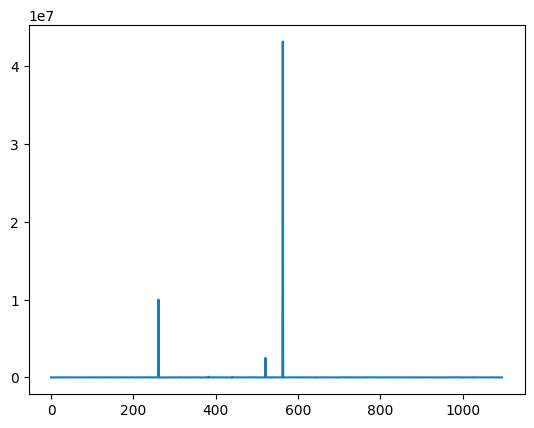

In [ ]:
#Weird outliers that need to be fixed -> I'll just put the average of that CHARACTER
plt.plot(data['PIZZERIA EXPENDITURE (annual)'])
plt.show()

In [ ]:
# data.sort_values(by=['PIZZERIA EXPENDITURE (annual)'], ascending=False)[:10]

# Changing for anyone over 75k cause that's unreal (Not judging at all)
for i in data.sort_values(by=['PIZZERIA EXPENDITURE (annual)'], ascending=False)[:5].index:
    data.loc[i, 'PIZZERIA EXPENDITURE (annual)'] = data[data['CHARACTER'] == data.loc[i, 'CHARACTER']].loc[data['PIZZERIA EXPENDITURE (annual)'] <= 75000].mean(numeric_only=True)['PIZZERIA EXPENDITURE (annual)']

# **ENCODING**

In [ ]:
#Label encoding CLUB/DEPARTMENT in "no particular order"
data['CLUB/DEPARTMENT'].fillna('NAN', inplace = True)
cat = pd.Categorical(
        data['CLUB/DEPARTMENT'],
        ['NAN', 'Gaming Club', 'SUTT', 'Mountaineering', 'DVM'],
        ordered = False
    ).codes
data['CLUB/DEPARTMENT'] = pd.Series(cat, dtype= np.int8)

In [ ]:
#Label encoding (For ordered Data)
data['SEX'] = data['SEX'].astype('category').cat.codes
data['HAS A S/O?'] = data['HAS A S/O?'].astype('category').cat.codes
data['ATTENDS LECTURES'] = data['ATTENDS LECTURES'].astype('category').cat.codes
data['CHARACTER'] = data['CHARACTER'].astype('category').cat.codes
data['GPL'] = data['GPL'].astype('category').cat.codes

data.rename(columns = {
    'SEX': 'MALE',

})

,MALE,AGES,ADMISSION MODE,CGPA-1,CGPA-2,CLUB/DEPARTMENT,BOARD STUDIED,DAYS SINCE LAST SHOWER,TREATS GIVEN,HAS A S/O?,ATTENDS LECTURES,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL,BIRTHDAY_MONTH,BIRTHDAY_DATE,DAY_OF_WEEK
0,1,19.0,BITSAT,8.850000,7.000000,0,CBSE,12,4,1,0,1,20495.0,5.00,0,4,22,4
1,0,21.0,DASA,7.010000,9.000000,0,ICSE,1,1,1,0,0,2361.0,0.20,1,8,8,4
2,0,20.0,BITSAT,3.000000,8.000000,0,CBSE,5,4,1,0,0,8548.0,0.30,1,5,5,2
3,0,21.0,DASA,6.324711,6.527311,0,CBSE,7,4,1,0,0,4086.0,0.20,1,10,6,0
4,1,21.0,BITSAT,5.650000,9.000000,0,CBSE,7,3,1,0,1,13767.0,8.50,0,3,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1,19.0,BOARD TOPPER,6.020000,3.000000,0,CBSE,6,0,0,0,0,13166.0,3.90,0,7,16,5
1093,0,24.0,BOARD TOPPER,3.570000,6.000000,0,CBSE,5,2,0,0,0,5619.0,0.30,1,2,3,3
1094,0,21.0,BITSAT,3.710000,5.000000,1,CBSE,0,4,0,1,1,17559.0,5.40,0,4,12,5
1095,1,22.0,DASA,9.680000,5.000000,0,CBSE,3,3,0,0,0,16411.0,8.70,0,4,25,3


In [ ]:
#One Hot encoding (For unrelated data)
data = data.join(pd.get_dummies(data['ADMISSION MODE'], prefix='ADMISSION_MODE')).drop(columns=['ADMISSION MODE'])
data = data.join(pd.get_dummies(data['BOARD STUDIED'], prefix='BOARD_STUDIED')).drop(columns=['BOARD STUDIED'])

In [ ]:
#Change datatypes
data.dtypes
data['AGES'] = data['AGES'].astype('int8')
data['BIRTHDAY_MONTH'] = data['BIRTHDAY_MONTH'].astype('int8')
data['BIRTHDAY_DATE'] = data['BIRTHDAY_DATE'].astype('int8')
data['PIZZERIA EXPENDITURE (annual)'] = data['PIZZERIA EXPENDITURE (annual)'].astype('int32')

In [ ]:
#Putting GPL column at the end
cols = list(data.columns.values)
cols.remove('GPL')
cols.append('GPL')
data = data[cols]

# **Final Data**

In [ ]:
data.dtypes

SEX                                 int8
AGES                                int8
CGPA-1                           float64
CGPA-2                           float64
CLUB/DEPARTMENT                     int8
DAYS SINCE LAST SHOWER             int64
TREATS GIVEN                       int64
HAS A S/O?                          int8
ATTENDS LECTURES                    int8
CHARACTER                           int8
PIZZERIA EXPENDITURE (annual)      int32
GRAMS / MONTH                    float64
BIRTHDAY_MONTH                      int8
BIRTHDAY_DATE                       int8
DAY_OF_WEEK                        int64
ADMISSION_MODE_BITSAT              uint8
ADMISSION_MODE_BOARD TOPPER        uint8
ADMISSION_MODE_DASA                uint8
BOARD_STUDIED_CBSE                 uint8
BOARD_STUDIED_ICSE                 uint8
BOARD_STUDIED_Other                uint8
GPL                                 int8
dtype: object

In [ ]:
display(data)

,SEX,AGES,CGPA-1,CGPA-2,CLUB/DEPARTMENT,DAYS SINCE LAST SHOWER,TREATS GIVEN,HAS A S/O?,ATTENDS LECTURES,CHARACTER,...,BIRTHDAY_MONTH,BIRTHDAY_DATE,DAY_OF_WEEK,ADMISSION_MODE_BITSAT,ADMISSION_MODE_BOARD TOPPER,ADMISSION_MODE_DASA,BOARD_STUDIED_CBSE,BOARD_STUDIED_ICSE,BOARD_STUDIED_Other,GPL
0,1,19,8.850000,7.000000,0,12,4,1,0,1,...,4,22,4,1,0,0,1,0,0,0
1,0,21,7.010000,9.000000,0,1,1,1,0,0,...,8,8,4,0,0,1,0,1,0,1
2,0,20,3.000000,8.000000,0,5,4,1,0,0,...,5,5,2,1,0,0,1,0,0,1
3,0,21,6.324711,6.527311,0,7,4,1,0,0,...,10,6,0,0,0,1,1,0,0,1
4,1,21,5.650000,9.000000,0,7,3,1,0,1,...,3,15,5,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1,19,6.020000,3.000000,0,6,0,0,0,0,...,7,16,5,0,1,0,1,0,0,0
1093,0,24,3.570000,6.000000,0,5,2,0,0,0,...,2,3,3,0,1,0,1,0,0,1
1094,0,21,3.710000,5.000000,1,0,4,0,1,1,...,4,12,5,1,0,0,1,0,0,0
1095,1,22,9.680000,5.000000,0,3,3,0,0,0,...,4,25,3,0,0,1,1,0,0,0


In [ ]:
data.to_csv("/content/GPL_Cleaned_Data.csv", sep=',')